In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#loading dataset
dataset = pd.read_csv('netflix_titles.csv')
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Check for missing values

In [3]:
dataset.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Check for an overview of the data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
dataset.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Drop the few null rows in Date added, rating and duration columns respectively

In [6]:
dataset.dropna(subset=["date_added", "rating", "duration"], inplace=True)

In [7]:
dataset[["date_added", "rating", "duration"]].isna().sum()

date_added    0
rating        0
duration      0
dtype: int64

In [8]:
dataset['date_added'] = dataset['date_added'].dropna(axis=0, how='any', inplace=False)
dataset['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8790, dtype: object

In [9]:
dataset['rating'] = dataset['rating'].dropna(axis=0, how='any', inplace=False)
dataset['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8790, dtype: object

In [10]:
dataset['duration'] = dataset['duration'].dropna(axis=0, how='any', inplace=False)
dataset['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8790, dtype: object

## Fill in the null rows in director, cast and country column with (“None Specified”, “None
listed” and “Non Specified “) respectively

In [11]:
dataset.fillna(value={"director":"None Specified","cast":"None listed","country":"Non Specified"}, inplace=True)

In [12]:
dataset['director'] = dataset['director'].fillna('None Specified')
dataset['director']

0       Kirsten Johnson
1        None Specified
2       Julien Leclercq
3        None Specified
4        None Specified
             ...       
8802      David Fincher
8803     None Specified
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8790, dtype: object

In [13]:
dataset['cast'] = dataset['cast'].fillna('None listed')
dataset['cast']

0                                             None listed
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                             None listed
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                          None listed
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8790, dtype: object

In [14]:
dataset['country'] = dataset['country'].fillna('Non Specified')
dataset['country'] 


0       United States
1        South Africa
2       Non Specified
3       Non Specified
4               India
            ...      
8802    United States
8803    Non Specified
8804    United States
8805    United States
8806            India
Name: country, Length: 8790, dtype: object

In [15]:
dataset[["director" ,"cast", "country"]]

,director,cast,country
0,Kirsten Johnson,None listed,United States
1,None Specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa
2,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Non Specified
3,None Specified,None listed,Non Specified
4,None Specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India
...,...,...,...
8802,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States
8803,None Specified,None listed,Non Specified
8804,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States
8805,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States


## Recheck for missing values

In [16]:
dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Check the value count for Duration column

In [17]:
dataset['duration'].value_counts()

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [18]:
dataset['duration'].count() 

8790

## Check the value count for type column

In [19]:
dataset['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [20]:
dataset['type'].count()

8790

## Using pie chart in matplotlib visualize the type column (Movie and TV Show)

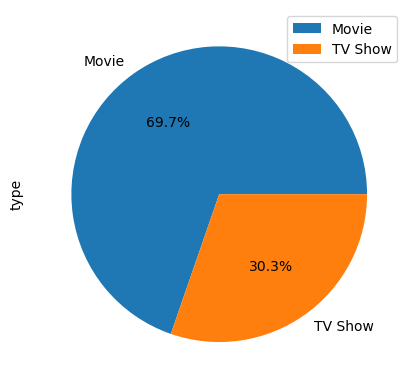

In [21]:
dataset['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend()
plt.show()

## Subset the data to only include Movies in the type Column


In [22]:
#df[df['col']== condition]
moviesOnly =dataset[dataset['type'] == 'Movie']
moviesOnly

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non Specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [23]:
dataset.query('type == "Movie"')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non Specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Get the counts of directors in the dataset

In [24]:
dataset['director'].count()

8790

In [25]:
dataset['director']

0       Kirsten Johnson
1        None Specified
2       Julien Leclercq
3        None Specified
4        None Specified
             ...       
8802      David Fincher
8803     None Specified
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8790, dtype: object

## Visualize the top movies directors

In [6]:
topDir =dataset['director'].value_counts()
topDir

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [7]:
#split the names of the director 
topDir = dataset['director'].str.split(',', expand=True).stack()
#convert director to a dataframe
topDir = pd.DataFrame(topDir)
#name the column
topDir.columns =['Directors']
#Let's view the first few rows
topDir.head()

Directors
0 0  Kirsten Johnson
2 0  Julien Leclercq
5 0    Mike Flanagan
6 0    Robert Cullen
  1   José Luis Ucha

In [8]:
#selecting just the known directors
topDir= topDir[topDir['Directors'] !='None Specified']
topDir = topDir.groupby(['Directors']).size().reset_index(name='moviesOnly')
topDir

,Directors,moviesOnly
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5115,Çagan Irmak,1
5116,Ísold Uggadóttir,1
5117,Óskar Thór Axelsson,1
5118,Ömer Faruk Sorak,2


In [9]:
topDir2 = pd.DataFrame(topDir.sort_values(by=['moviesOnly'], ascending=False))
topDir2

,Directors,moviesOnly
4020,Rajiv Chilaka,22
4067,Raúl Campos,18
261,Jan Suter,18
4651,Suhas Kadav,16
3235,Marcus Raboy,16
...,...,...
2340,J. Davis,1
2341,J. Lee Thompson,1
2342,J. Michael Long,1
609,Smriti Keshari,1


In [18]:
Top_ten_only= topDir2.head(10)
Top_ten_only

,Directors,moviesOnly
4020,Rajiv Chilaka,22
4067,Raúl Campos,18
261,Jan Suter,18
4651,Suhas Kadav,16
3235,Marcus Raboy,16
2450,Jay Karas,15
1382,Cathy Garcia-Molina,13
2447,Jay Chapman,12
3306,Martin Scorsese,12
5074,Youssef Chahine,12


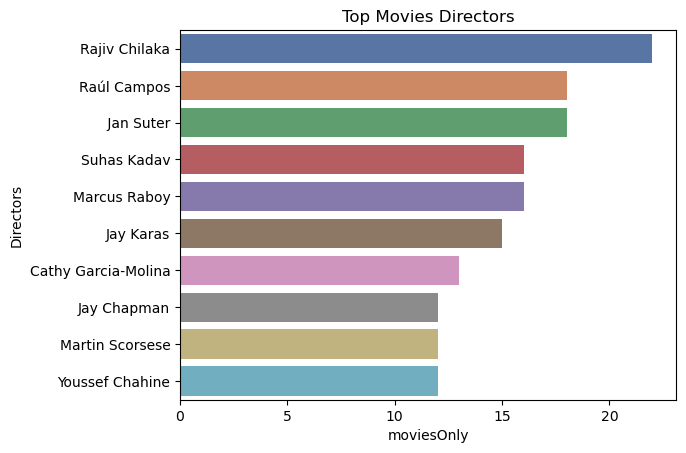

In [23]:
sns.barplot(y='Directors', x='moviesOnly', data=Top_ten_only, palette='deep')
plt.title('Top Movies Directors')
plt.show()

<BarContainer object of 6 artists>

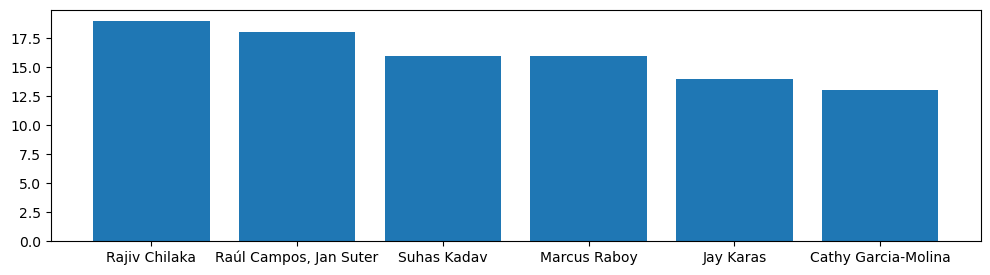

In [32]:
data = {'Rajiv Chilaka': 19, 'Raúl Campos, Jan Suter': 18, 'Suhas Kadav': 16, 'Marcus Raboy': 16, 
        'Jay Karas': 14, 'Cathy Garcia-Molina': 13}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 1, figsize=(12, 3), sharey=True)
axs.bar(names, values)

## Check for outliers in the duration column

In [33]:
#duration needs to be converted to integers first
dataset['duration'] = dataset['duration'].str.strip('min')
dataset['duration'] = dataset['duration'].str.strip('Season')
dataset['duration'] = dataset['duration'].str.strip('Seasons')
dataset['duration'].value_counts()

1       1791
2        421
3        199
90       152
94       146
        ... 
189        1
273        1
212        1
224        1
191        1
Name: duration, Length: 210, dtype: int64

In [6]:
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [40]:
dataset['duration'].unique()

array([ 90.,   2.,   1.,  91., 125.,   9., 104., 127.,   4.,  67.,  94.,
         5., 161.,  61., 166., 147., 103.,  97., 106., 111.,   3., 110.,
       105.,  96., 124., 116.,  98.,  23., 115., 122.,  99.,  88., 100.,
         6., 102.,  93.,  95.,  85.,  83., 113.,  13., 182.,  48., 145.,
        87.,  92.,  80., 117., 128., 119., 143., 114., 118., 108.,  63.,
       121., 142., 154., 120.,  82., 109., 101.,  86., 229.,  76.,  89.,
       156., 112., 107., 129., 135., 136., 165., 150., 133.,  70.,  84.,
       140.,  78.,   7.,  64.,  59., 139.,  69., 148., 189., 141., 130.,
       138.,  81., 132.,  10., 123.,  65.,  68.,  66.,  62.,  74., 131.,
        39.,  46.,  38.,   8.,  17., 126., 155., 159., 137.,  12., 273.,
        36.,  34.,  77.,  60.,  49.,  58.,  72., 204., 212.,  25.,  73.,
        29.,  47.,  32.,  35.,  71., 149.,  33.,  15.,  54., 224., 162.,
        37.,  75.,  79.,  55., 158., 164., 173., 181., 185.,  21.,  24.,
        51., 151.,  42.,  22., 134., 177.,  52.,  1

In [34]:
dataset['duration']=dataset['duration'].astype('float')
dataset['duration'].dtype

dtype('float64')

In [ ]:
duration = dataset['duration'].value_counts()

In [ ]:
plt.figure(figsize=(10 ,6))
Duration = df['Duration'].value_counts()
sns.boxplot(x='Duration' , y='type',data =df )
#sns.boxplot(x = Duration.index, y = Duration.values)
plt.show()

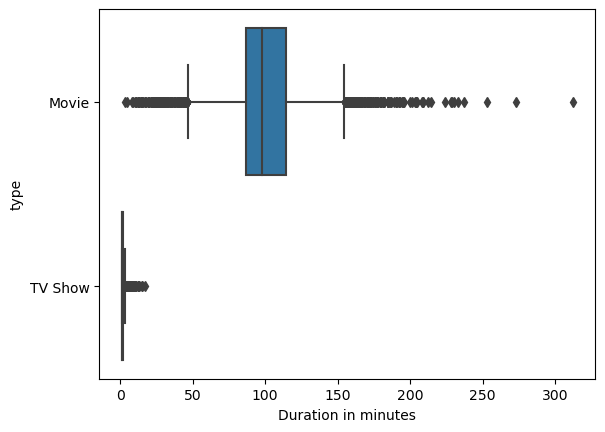

In [96]:
#showing the outliers in duration column through visualization
sns.boxplot(data=dataset, x='duration', y='type')
plt.xlabel('Duration in minutes')
plt.show()

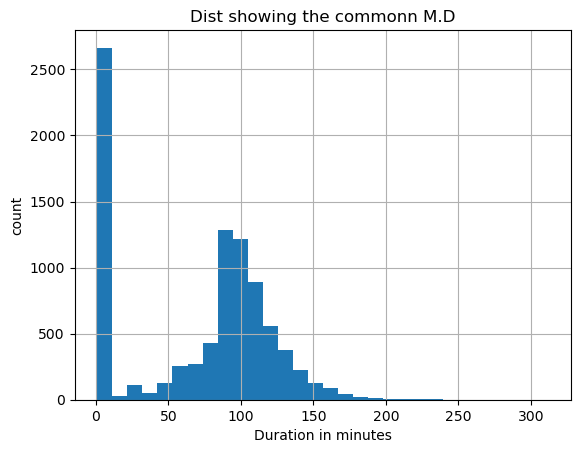

In [37]:
dataset["duration"].hist(bins = 30)
plt.xlabel ("Duration in minutes")
plt.ylabel("count")
plt.title("Dist showing the commonn M.D")
plt.show()

In [ ]:
sns.catplot(data=dataset, x='duration', y='release_year')

## What are the top countries by movies counts

In [52]:
moviesOnly

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non Specified,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [49]:
countryCount= moviesOnly.value_counts('country')
countryCount

country
United States      2055
India               893
Non Specified       439
United Kingdom      206
Canada              122
                   ... 
India, Mexico         1
India, Malaysia       1
India, Japan          1
India, Iran           1
Zimbabwe              1
Length: 652, dtype: int64

## Visualize the top countries by movie count

In [47]:
topCountry = countryCount.head(10)
topCountry

country
United States     2055
India              893
Non Specified      439
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Japan               76
dtype: int64

In [65]:
top_country_count=pd.DataFrame(topCountry)
top_country_count.columns=['count1']
top_country_count.head()

,count1
country,
United States,2055
India,893
Non Specified,439
United Kingdom,206
Canada,122


In [64]:
#movie_Only = moviesOnly.head(10)
#movie_Only

In [66]:
movie_count=pd.DataFrame(moviesOnly['country'])
movie_count

,country
0,United States
6,Non Specified
7,"United States, Ghana, Burkina Faso, United Kin..."
9,United States
12,"Germany, Czech Republic"
...,...
8801,"United Arab Emirates, Jordan"
8802,United States
8804,United States
8805,United States


In [67]:
sorted_country = movie_count.groupby(['country']).size().reset_index(name='top_country_count')
sorted_country.head(10)

,country,top_country_count
0,", France, Algeria",1
1,Argentina,38
2,"Argentina, Brazil, France, Poland, Germany, De...",1
3,"Argentina, Chile",2
4,"Argentina, Chile, Peru",1
5,"Argentina, France",1
6,"Argentina, France, United States, Germany, Qatar",1
7,"Argentina, Italy",1
8,"Argentina, Spain",7
9,"Argentina, United States",1


In [68]:
ultimate_top_country = pd.DataFrame(sorted_country.sort_values(by=['top_country_count'], ascending=False))
ultimate_top_country.head(10)

,country,top_country_count
526,United States,2055
218,India,893
321,Non Specified,439
441,United Kingdom,206
50,Canada,122
385,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
278,Japan,76


In [70]:
Top_Country =ultimate_top_country.head(10)
Top_Country

,country,top_country_count
526,United States,2055
218,India,893
321,Non Specified,439
441,United Kingdom,206
50,Canada,122
385,Spain,97
128,Egypt,92
319,Nigeria,86
238,Indonesia,77
278,Japan,76


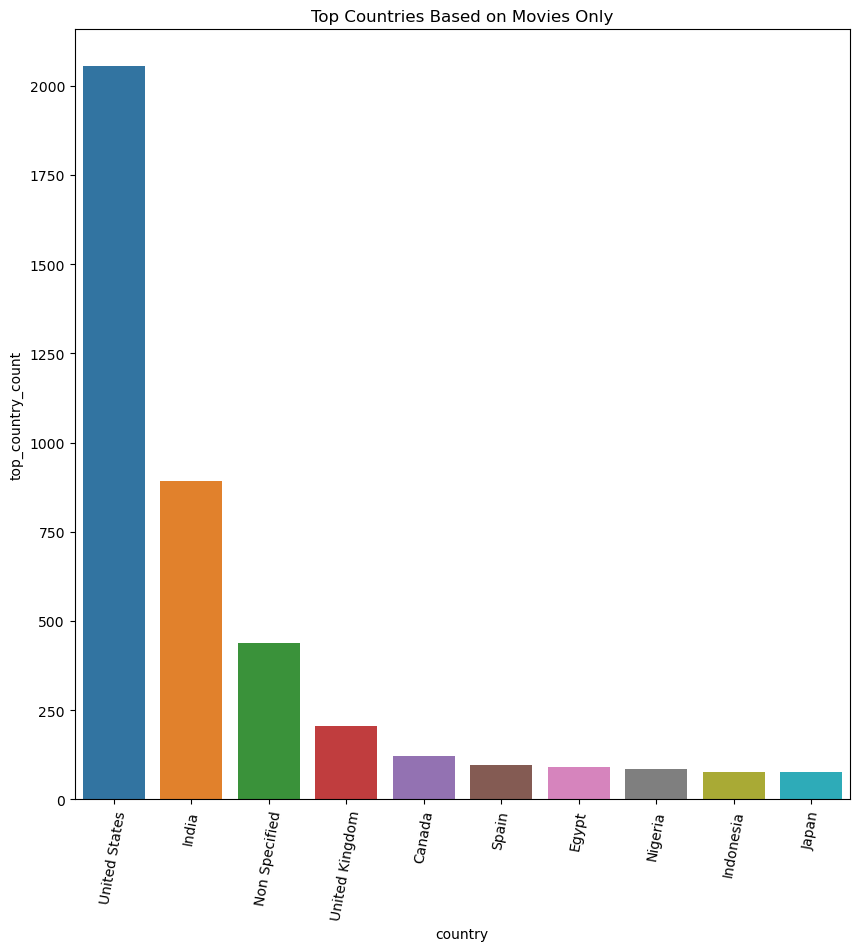

In [72]:
#Visualization
plt.figure(figsize=(10,10))
sns.barplot(x=Top_Country['country'], y=Top_Country['top_country_count'])
plt.xticks(rotation=80)
plt.xlabel('country')
plt.ylabel('top_country_count')
plt.title('Top Countries Based on Movies Only')
plt.show()

## Select movies type that are been released in the last 10 year (where years >=2012)

In [95]:
movie_type=dataset[(dataset["type"]=="Movie")&(dataset["release_year"]>=2012)]
movie_type

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None listed,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Non Specified,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Non Specified,"September 22, 2021",2021,TV-PG,91.0,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
...,...,...,...,...,...,...,...,...,...,...,...,...
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157.0,"Dramas, International Movies","A soap opera producer, director and makeup art..."
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98.0,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131.0,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96.0,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...


In [83]:
dataset['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

## Using bar plot, show the count of movies and series produced in the last 10 years
(where years >= 2012)

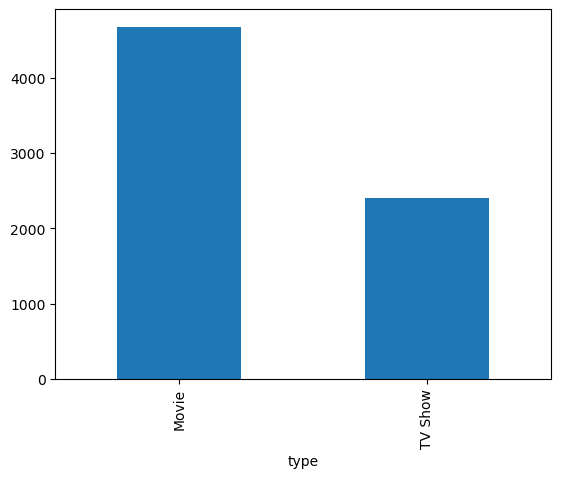

In [94]:
dataset_2=dataset[dataset["release_year"]>=2012]
dataset_2.groupby("type")["release_year"].count().plot(kind="bar")
plt.show()

## Using a count plot show the total movies and TV show been released in the last 10 years

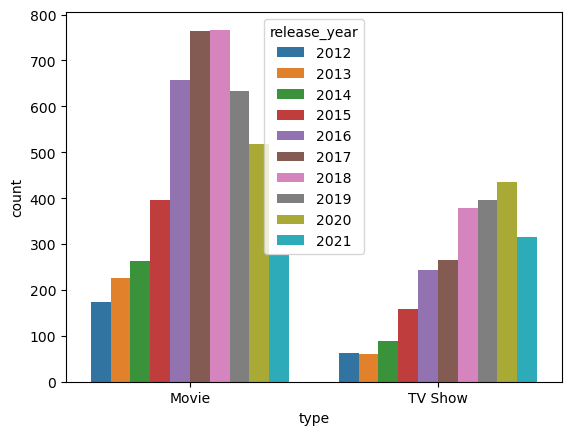

In [93]:
sns.countplot(data=dataset_2, x="type", hue="release_year")
plt.show()

## Check for unique rating

In [84]:
dataset['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)